# Caesar Cipher — Encryption and Decryption

The **Caesar Cipher** is one of the oldest and simplest encryption techniques.  
It is a type of **substitution cipher** where each letter in the plaintext is shifted  
by a fixed number of positions down the alphabet.

**Formula:**
> Encryption: C = (P + K) mod 26  
> Decryption: P = (C - K) mod 26  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


def encrypt(text, shift):
    result = ""
    for char in text:
        if char.isupper():
            result += chr((ord(char) - 65 + shift) % 26 + 65)
        elif char.islower():
            result += chr((ord(char) - 97 + shift) % 26 + 97)
        else:
            result += char
    return result

def decrypt(cipher, shift):
    result = ""
    for char in cipher:
        if char.isupper():
            result += chr((ord(char) - 65 - shift) % 26 + 65)
        elif char.islower():
            result += chr((ord(char) - 97 - shift) % 26 + 97)
        else:
            result += char
    return result


In [2]:
def caesar_steps(text, shift):
    rows = []
    for ch in text.upper():
        if ch.isalpha():
            y = ord(ch) - 65
            y_minus_k = y - shift
            shifted = (y_minus_k * 1) % 26  # For Caesar, multiplier=1 (unlike affine)
            plain = chr((shifted + 65))
            rows.append({
                "Cipher": ch,
                "y": y,
                "y - shift": y_minus_k,
                "(y - shift) mod 26": shifted,
                "Plain": plain
            })
    return pd.DataFrame(rows)


In [3]:
text = input("Enter your text: ")
shift = int(input("Enter shift value (1–25): "))

cipher = encrypt(text, shift)
plain = decrypt(cipher, shift)

display(Markdown(f"### 🔑 Shift Value: `{shift}`"))
display(Markdown(f"### 🧾 Encrypted Text: `{cipher}`"))
display(Markdown(f"### 🧩 Decrypted Text: `{plain}`"))

df = caesar_steps(cipher, shift)
display(Markdown("### 🧮 Step-by-Step Computation"))
display(df)


Enter your text: Hasnaat
Enter shift value (1–25): 3


### 🔑 Shift Value: `3`

### 🧾 Encrypted Text: `Kdvqddw`

### 🧩 Decrypted Text: `Hasnaat`

### 🧮 Step-by-Step Computation

,Cipher,y,y - shift,(y - shift) mod 26,Plain
0,K,10,7,7,H
1,D,3,0,0,A
2,V,21,18,18,S
3,Q,16,13,13,N
4,D,3,0,0,A
5,D,3,0,0,A
6,W,22,19,19,T


# 🧮 Affine Cipher — Encryption and Decryption

The **Affine Cipher** is an advanced form of **substitution cipher** that combines both **multiplicative** and **additive** transformations to encrypt alphabetic text.  
It is a more generalized version of the **Caesar Cipher**, which can be seen as a special case where the multiplicative key `a = 1`.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from math import gcd
from IPython.display import display, Markdown

ALPHA = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
A2I = {c:i for i,c in enumerate(ALPHA)}
I2A = {i:c for i,c in enumerate(ALPHA)}

def mod_inverse(a: int, m: int = 26) -> int:
    """Return a^(-1) mod m, raise if not invertible."""
    try:
        return pow(a, -1, m)
    except ValueError:
        raise ValueError(f"No modular inverse for a={a} under mod {m}. Pick a coprime with 26.")

def affine_encrypt(plaintext: str, a: int, b: int):
    """Return (ciphertext, steps_df). Uppercase A–Z only transformed; others kept."""
    out, rows = [], []
    for ch in plaintext.upper():
        if ch.isalpha():
            x = A2I[ch]
            axb = a * x + b
            y  = axb % 26
            c  = I2A[y]
            out.append(c)
            rows.append({"plain": ch, "x": x, "a*x+b": axb, "(a*x+b) mod 26": y, "cipher": c})
        else:
            out.append(ch)
            rows.append({"plain": ch, "x": None, "a*x+b": None, "(a*x+b) mod 26": None, "cipher": ch})
    return "".join(out), pd.DataFrame(rows)

def affine_decrypt(ciphertext: str, a: int, b: int):
    """Return (plaintext, steps_df)."""
    ainv = mod_inverse(a, 26)
    out, rows = [], []
    for ch in ciphertext.upper():
        if ch.isalpha():
            y = A2I[ch]
            ymb = y - b
            ainv_term = ainv * ymb
            x = ainv_term % 26
            p = I2A[x]
            out.append(p)
            rows.append({
                "cipher": ch, "y": y, "y - b": ymb,
                "a^{-1}(y - b)": ainv_term, "a^{-1}(y - b) mod 26": x, "plain": p
            })
        else:
            out.append(ch)
            rows.append({
                "cipher": ch, "y": None, "y - b": None,
                "a^{-1}(y - b)": None, "a^{-1}(y - b) mod 26": None, "plain": ch
            })
    return "".join(out), pd.DataFrame(rows)


In [18]:
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
msg  = input("Enter message: ")
a    = int(input("Enter 'a' (coprime with 26): "))
b    = int(input("Enter 'b': "))

if gcd(a, 26) != 1:
    raise ValueError(f"'a' must be coprime with 26. You entered {a} (gcd={gcd(a,26)}).")
if mode == "E":
    cipher, steps = affine_encrypt(msg, a, b)
    display(Markdown(f"### 🔐 Affine Encryption"))
    display(Markdown(f"- **a**: `{a}`  **b**: `{b}`"))
    display(Markdown(f"- **Plaintext**: `{msg}`"))
    display(Markdown(f"- **Ciphertext**: `{cipher}`"))
    display(Markdown("#### 🧮 Step-by-step (Encryption)"))
    display(steps)
else:
    plain, steps = affine_decrypt(msg, a, b)
    display(Markdown(f"### 🔓 Affine Decryption"))
    display(Markdown(f"- **a**: `{a}`  **b**: `{b}`"))
    display(Markdown(f"- **Ciphertext**: `{msg}`"))
    display(Markdown(f"- **Recovered Plaintext**: `{plain}`"))
    display(Markdown("#### 🧮 Step-by-step (Decryption)"))
    display(steps)




Mode [E=Encrypt / D=Decrypt]: E
Enter message: Hasnaat
Enter 'a' (coprime with 26): 3
Enter 'b': 5


### 🔐 Affine Encryption

- **a**: `3`  **b**: `5`

- **Plaintext**: `Hasnaat`

- **Ciphertext**: `AFHSFFK`

#### 🧮 Step-by-step (Encryption)

,plain,x,a*x+b,(a*x+b) mod 26,cipher
0,H,7,26,0,A
1,A,0,5,5,F
2,S,18,59,7,H
3,N,13,44,18,S
4,A,0,5,5,F
5,A,0,5,5,F
6,T,19,62,10,K


# 🧠 Playfair Cipher — Encryption & Decryption

The **Playfair Cipher** is a **digraph substitution cipher**, meaning it encrypts **pairs of letters** instead of single characters.  
Invented by **Charles Wheatstone in 1854** (popularized by Lord Playfair), it improves security by masking letter frequencies and patterns.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


def generate_matrix(keyword):
    """Generate Playfair 5x5 matrix (I and J combined)."""
    keyword = keyword.upper().replace("J", "I")
    seen = []
    for ch in keyword:
        if ch.isalpha() and ch not in seen:
            seen.append(ch)
    for ch in "ABCDEFGHIKLMNOPQRSTUVWXYZ":
        if ch not in seen:
            seen.append(ch)
    return np.array(seen).reshape(5, 5)

def find_pos(matrix, ch):
    ch = "I" if ch == "J" else ch
    loc = np.argwhere(matrix == ch)
    return tuple(loc[0]) if loc.size > 0 else None

def prepare_text(text):
    text = text.upper().replace("J", "I").replace(" ", "")
    pairs, i = [], 0
    while i < len(text):
        a = text[i]
        b = text[i + 1] if i + 1 < len(text) else "X"
        if a == b:
            pairs.append(a + "X")
            i += 1
        else:
            pairs.append(a + b)
            i += 2
    return pairs


In [9]:
def playfair_encrypt(pairs, matrix):
    result, steps = [], []
    for p in pairs:
        a, b = p
        r1, c1 = find_pos(matrix, a)
        r2, c2 = find_pos(matrix, b)
        if r1 == r2:
            ca, cb, rule = matrix[r1, (c1+1)%5], matrix[r2, (c2+1)%5], "Same Row → Right"
        elif c1 == c2:
            ca, cb, rule = matrix[(r1+1)%5, c1], matrix[(r2+1)%5, c2], "Same Col → Down"
        else:
            ca, cb, rule = matrix[r1, c2], matrix[r2, c1], "Rectangle Swap"
        result.append(ca + cb)
        steps.append({"Pair": p, "Rule": rule, "Cipher Pair": ca + cb})
    return "".join(result), pd.DataFrame(steps)

def playfair_decrypt(pairs, matrix):
    result, steps = [], []
    for p in pairs:
        a, b = p
        r1, c1 = find_pos(matrix, a)
        r2, c2 = find_pos(matrix, b)
        if r1 == r2:
            pa, pb, rule = matrix[r1, (c1-1)%5], matrix[r2, (c2-1)%5], "Same Row → Left"
        elif c1 == c2:
            pa, pb, rule = matrix[(r1-1)%5, c1], matrix[(r2-1)%5, c2], "Same Col → Up"
        else:
            pa, pb, rule = matrix[r1, c2], matrix[r2, c1], "Rectangle Swap"
        result.append(pa + pb)
        steps.append({"Cipher Pair": p, "Rule": rule, "Plain Pair": pa + pb})
    return "".join(result), pd.DataFrame(steps)


Enter keyword: Malik
Mode [E=Encrypt / D=Decrypt]: D
Enter text: RCXSLWIR


### 🔠 Playfair Cipher 5×5 Matrix

   0  1  2  3  4
0  M  A  L  I  K
1  B  C  D  E  F
2  G  H  N  O  P
3  Q  R  S  T  U
4  V  W  X  Y  Z


### 🔓 Decryption
**Keyword:** `MALIK`
**Plaintext:** `HASNAXAT`

,Cipher Pair,Rule,Plain Pair
0,RC,Same Col → Up,HA
1,XS,Same Col → Up,SN
2,LW,Rectangle Swap,AX
3,IR,Rectangle Swap,AT


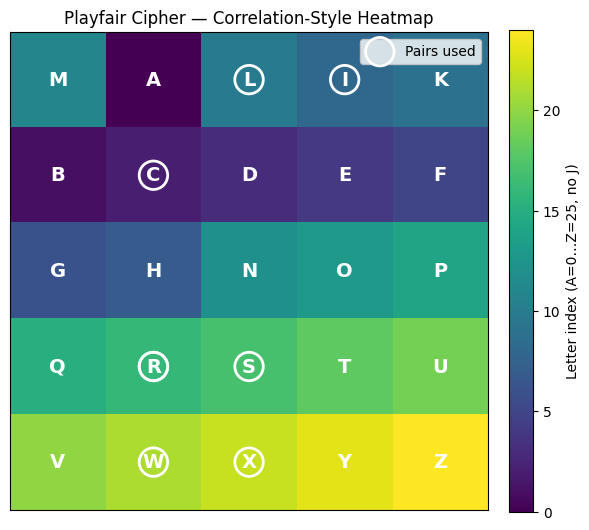

In [12]:
keyword = input("Enter keyword: ").strip().upper()
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper()
text = input("Enter text: ").strip()

matrix = generate_matrix(keyword)
pairs = prepare_text(text)

display(Markdown("### 🔠 Playfair Cipher 5×5 Matrix"))
print(pd.DataFrame(matrix))

if mode == "E":
    cipher, df = playfair_encrypt(pairs, matrix)
    display(Markdown(f"### 🔐 Encryption\n**Keyword:** `{keyword}`\n**Ciphertext:** `{cipher}`"))
    display(df)
else:
    plain, df = playfair_decrypt(pairs, matrix)
    display(Markdown(f"### 🔓 Decryption\n**Keyword:** `{keyword}`\n**Plaintext:** `{plain}`"))
    display(df)

# --- Correlation-style colorful matrix visualization ---
alphabet = "ABCDEFGHIKLMNOPQRSTUVWXYZ"
letter_to_idx = {ch: i for i, ch in enumerate(alphabet)}
val_matrix = np.vectorize(lambda ch: letter_to_idx[ch])(matrix)

# highlight first few digraph cells
pos = {matrix[i, j]: (i, j) for i in range(5) for j in range(5)}
coords = []
for p in pairs[:8]:
    a, b = p[0], p[1]
    a = "I" if a == "J" else a
    b = "I" if b == "J" else b
    if a in pos and b in pos:
        coords.extend([pos[a], pos[b]])

plt.figure(figsize=(6,6))
im = plt.imshow(val_matrix, cmap="viridis")
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Letter index (A=0…Z=25, no J)")

# annotate letters
for (i, j), ch in np.ndenumerate(matrix):
    plt.text(j, i, ch, ha="center", va="center", fontsize=14, fontweight="bold", color="white")

# highlight pair positions
if coords:
    r, c = zip(*coords)
    plt.scatter(c, r, s=420, facecolors="none", edgecolors="w", linewidths=2, label="Pairs used")

plt.title("Playfair Cipher — Correlation-Style Heatmap")
plt.legend(loc="upper right")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


# 🧮 Hill Cipher — Block Matrix Encryption

The **Hill Cipher** is a **polyalphabetic block cipher** that encrypts groups of letters using **matrix multiplication modulo 26**.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from math import gcd

ALPHA = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
A2I = {c:i for i,c in enumerate(ALPHA)}
I2A = {i:c for i,c in enumerate(ALPHA)}
MOD = 26


def modinv(a: int, m: int = MOD) -> int:
    """Multiplicative inverse of a modulo m (raises if none)."""
    try:
        return pow(a, -1, m)
    except ValueError:
        raise ValueError(f"No modular inverse for {a} mod {m}; gcd({a},{m}) != 1.")

def matrix_minor(M: np.ndarray, i: int, j: int) -> np.ndarray:
    """Minor of M at (i,j)."""
    return np.delete(np.delete(M, i, axis=0), j, axis=1)

def det_mod(M: np.ndarray, m: int = MOD) -> int:
    """Determinant modulo m (supports 2x2/3x3 cleanly; for larger, uses integer det then mod)."""
    n = M.shape[0]
    if n == 1:
        return int(M[0,0]) % m
    if n == 2:
        return int((M[0,0]*M[1,1] - M[0,1]*M[1,0]) % m)
    # Laplace expansion (ok for small n)
    det = 0
    for j in range(n):
        cofactor = ((-1) ** j) * M[0, j] * det_mod(matrix_minor(M, 0, j), m)
        det = (det + cofactor) % m
    return int(det % m)

def adjugate(M: np.ndarray, m: int = MOD) -> np.ndarray:
    """Adjugate matrix (transpose of cofactor matrix) modulo m."""
    n = M.shape[0]
    C = np.zeros_like(M, dtype=int)
    for i in range(n):
        for j in range(n):
            minor = matrix_minor(M, i, j)
            C[i, j] = ((-1) ** (i + j)) * det_mod(minor, m)
    return C.T % m

def matrix_mod_inverse(K: np.ndarray, m: int = MOD) -> np.ndarray:
    """Modular inverse matrix of K (mod m) using adj(K) * det(K)^{-1} mod m."""
    det = det_mod(K, m)
    if gcd(det, m) != 1:
        raise ValueError(f"Key matrix not invertible mod {m}: det={det}, gcd(det,{m})={gcd(det,m)}")
    det_inv = modinv(det, m)
    return (det_inv * adjugate(K, m)) % m


In [15]:
def clean_text(s: str) -> str:
    return ''.join(ch for ch in s.upper() if ch.isalpha())

def to_blocks(text: str, n: int) -> list:
    """Split text into size-n blocks, pad with 'X'."""
    text = clean_text(text)
    if len(text) % n != 0:
        text += 'X' * (n - (len(text) % n))
    return [text[i:i+n] for i in range(0, len(text), n)]

def block_to_vec(block: str) -> np.ndarray:
    return np.array([A2I[c] for c in block], dtype=int).reshape(-1, 1)

def vec_to_block(vec: np.ndarray) -> str:
    return ''.join(I2A[int(v % MOD)] for v in vec.flatten())

def hill_encrypt(plaintext: str, K: np.ndarray) -> tuple[str, pd.DataFrame]:
    n = K.shape[0]
    blocks = to_blocks(plaintext, n)
    out = []
    rows = []
    for idx, b in enumerate(blocks, start=1):
        P = block_to_vec(b)
        C = (K @ P) % MOD
        cblock = vec_to_block(C)
        out.append(cblock)
        rows.append({
            "block_no": idx,
            "P_block": b,
            "P_vec": P.flatten().tolist(),
            "KxP mod 26": C.flatten().tolist(),
            "C_block": cblock
        })
    return ''.join(out), pd.DataFrame(rows)

def hill_decrypt(ciphertext: str, K: np.ndarray) -> tuple[str, pd.DataFrame]:
    n = K.shape[0]
    K_inv = matrix_mod_inverse(K, MOD)
    blocks = to_blocks(ciphertext, n)
    out = []
    rows = []
    for idx, b in enumerate(blocks, start=1):
        C = block_to_vec(b)
        P = (K_inv @ C) % MOD
        pblock = vec_to_block(P)
        out.append(pblock)
        rows.append({
            "block_no": idx,
            "C_block": b,
            "C_vec": C.flatten().tolist(),
            "KinvxC mod 26": P.flatten().tolist(),
            "P_block": pblock
        })
    return ''.join(out), pd.DataFrame(rows)



Enter block size n (2 or 3 recommended): 2

Enter the 2x2 key matrix K (row-wise, space-separated integers in [0..25])
Row 1: 3 3
Row 2: 2 5

Mode [E=Encrypt / D=Decrypt]: D
Enter text: VOPXAAWX


### 🔓 Hill Decryption

**K (mod 26):**

   0  1
0  3  3
1  2  5

**Ciphertext:** `VOPXAAWX`

**Recovered Plaintext:** `HASNAATX`

#### 🧮 Step-by-step (per block)

,block_no,C_block,C_vec,KinvxC mod 26,P_block
0,1,VO,"[21, 14]","[7, 0]",HA
1,2,PX,"[15, 23]","[18, 13]",SN
2,3,AA,"[0, 0]","[0, 0]",AA
3,4,WX,"[22, 23]","[19, 23]",TX


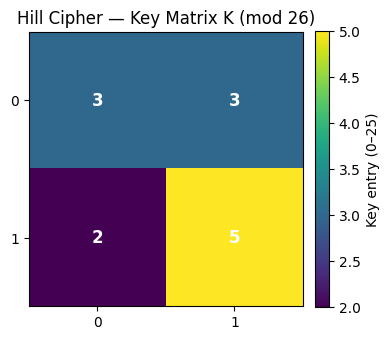

In [19]:
# --- Choose n and Key Matrix ---
n = int(input("Enter block size n (2 or 3 recommended): ").strip() or "3")

print(f"\nEnter the {n}x{n} key matrix K (row-wise, space-separated integers in [0..25])")
rows = []
for i in range(n):
    row = input(f"Row {i+1}: ").strip()
    rows.append([int(x) % MOD for x in row.split()])
K = np.array(rows, dtype=int)

# Validate invertibility
detK = det_mod(K, MOD)
if gcd(detK, MOD) != 1:
    raise ValueError(f"Key not invertible mod 26; det={detK}, gcd(det,26)={gcd(detK,26)}")

mode = input("\nMode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
text = input("Enter text: ")

if mode == "E":
    cipher, steps = hill_encrypt(text, K)
    display(Markdown(f"### 🔐 Hill Encryption"))
    display(Markdown(f"**K (mod 26):**\n\n{pd.DataFrame(K)}"))
    display(Markdown(f"**Plaintext:** `{clean_text(text)}`"))
    display(Markdown(f"**Ciphertext:** `{cipher}`"))
    display(Markdown("#### 🧮 Step-by-step (per block)"))
    display(steps)
else:
    plain, steps = hill_decrypt(text, K)
    display(Markdown(f"### 🔓 Hill Decryption"))
    display(Markdown(f"**K (mod 26):**\n\n{pd.DataFrame(K)}"))
    display(Markdown(f"**Ciphertext:** `{clean_text(text)}`"))
    display(Markdown(f"**Recovered Plaintext:** `{plain}`"))
    display(Markdown("#### 🧮 Step-by-step (per block)"))
    display(steps)
# Heatmap-like view of K and a block-wise index mapping plot
plt.figure(figsize=(4,4))
plt.imshow(K, cmap="viridis")
plt.colorbar(fraction=0.046, pad=0.04).set_label("Key entry (0–25)")
plt.title("Hill Cipher — Key Matrix K (mod 26)")
for (i,j), val in np.ndenumerate(K):
    plt.text(j, i, str(int(val)), ha="center", va="center", color="white", fontsize=12, fontweight="bold")
plt.xticks(range(K.shape[1])); plt.yticks(range(K.shape[0]))
plt.tight_layout()
plt.show()



# 🔤 Vigenère Cipher — Polyalphabetic Substitution

The **Vigenère Cipher** encrypts text using a repeating **keyword** to choose a different Caesar shift for each letter.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

ALPHA = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
A2I = {c:i for i,c in enumerate(ALPHA)}
I2A = {i:c for i,c in enumerate(ALPHA)}


In [21]:
def clean_letter(c: str) -> str:
    return c.upper() if c.isalpha() else c

def key_stream(key: str, text: str) -> list:
    """
    Build a key stream aligned to letters in `text`.
    Non-letters keep placeholder None and do not consume key.
    """
    key = ''.join(ch for ch in key.upper() if ch.isalpha())
    ks, ki = [], 0
    for ch in text:
        if ch.isalpha():
            ks.append(key[ki % len(key)])
            ki += 1
        else:
            ks.append(None)
    return ks


In [22]:
def vigenere_encrypt(plaintext: str, key: str):
    ks = key_stream(key, plaintext)
    out, rows = [], []
    for i, ch in enumerate(plaintext):
        if ch.isalpha():
            p = A2I[ch.upper()]
            kch = ks[i]
            k = A2I[kch]
            y = (p + k) % 26
            c = I2A[y]
            out.append(c)
            rows.append({
                "pos": i+1,
                "plain": ch.upper(),
                "key": kch,
                "p_idx": p,
                "k_idx": k,
                "(p+k) mod 26": y,
                "cipher": c
            })
        else:
            out.append(ch)
            rows.append({
                "pos": i+1,
                "plain": ch,
                "key": None,
                "p_idx": None,
                "k_idx": None,
                "(p+k) mod 26": None,
                "cipher": ch
            })
    return "".join(out), pd.DataFrame(rows)

def vigenere_decrypt(ciphertext: str, key: str):
    ks = key_stream(key, ciphertext)
    out, rows = [], []
    for i, ch in enumerate(ciphertext):
        if ch.isalpha():
            y = A2I[ch.upper()]
            kch = ks[i]
            k = A2I[kch]
            p = (y - k) % 26
            c = I2A[p]
            out.append(c)
            rows.append({
                "pos": i+1,
                "cipher": ch.upper(),
                "key": kch,
                "y_idx": y,
                "k_idx": k,
                "(y-k) mod 26": p,
                "plain": c
            })
        else:
            out.append(ch)
            rows.append({
                "pos": i+1,
                "cipher": ch,
                "key": None,
                "y_idx": None,
                "k_idx": None,
                "(y-k) mod 26": None,
                "plain": ch
            })
    return "".join(out), pd.DataFrame(rows)


In [23]:
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
text = input("Enter text: ")
key  = input("Enter key (letters only): ")

if not any(ch.isalpha() for ch in key):
    raise ValueError("Key must contain at least one alphabetic character.")

if mode == "E":
    cipher, df = vigenere_encrypt(text, key)
    display(Markdown("### 🔐 Vigenère Encryption"))
    display(Markdown(f"- **Key:** `{key}`"))
    display(Markdown(f"- **Plaintext:** `{text}`"))
    display(Markdown(f"- **Ciphertext:** `{cipher}`"))
    display(Markdown("#### 🧮 Step-by-step (letters only affect indices)"))
    display(df)
else:
    plain, df = vigenere_decrypt(text, key)
    display(Markdown("### 🔓 Vigenère Decryption"))
    display(Markdown(f"- **Key:** `{key}`"))
    display(Markdown(f"- **Ciphertext:** `{text}`"))
    display(Markdown(f"- **Recovered Plaintext:** `{plain}`"))
    display(Markdown("#### 🧮 Step-by-step (letters only affect indices)"))
    display(df)


Mode [E=Encrypt / D=Decrypt]: E
Enter text: Batman
Enter key (letters only): Vengence


### 🔐 Vigenère Encryption

- **Key:** `Vengence`

- **Plaintext:** `Batman`

- **Ciphertext:** `WEGSEA`

#### 🧮 Step-by-step (letters only affect indices)

,pos,plain,key,p_idx,k_idx,(p+k) mod 26,cipher
0,1,B,V,1,21,22,W
1,2,A,E,0,4,4,E
2,3,T,N,19,13,6,G
3,4,M,G,12,6,18,S
4,5,A,E,0,4,4,E
5,6,N,N,13,13,0,A


# 🚄 Rail Fence Cipher — Transposition Technique

The **Rail Fence Cipher** is a form of **transposition cipher**, meaning it encrypts by **rearranging** letters rather than substituting them.

In [24]:
def rail_fence_encrypt(text, rails):
    """Encrypt text using the Rail Fence pattern."""
    text = ''.join(ch.upper() for ch in text if ch.isalpha())
    fence = [['' for _ in range(len(text))] for _ in range(rails)]
    row, step = 0, 1
    for col, ch in enumerate(text):
        fence[row][col] = ch
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step
    cipher = ''.join(''.join(r) for r in fence)
    df = pd.DataFrame(fence).replace('', '.')
    return cipher, df

def rail_fence_decrypt(cipher, rails):
    """Decrypt by reconstructing zigzag traversal."""
    n = len(cipher)
    pattern = [['' for _ in range(n)] for _ in range(rails)]
    row, step = 0, 1
    for i in range(n):
        pattern[row][i] = '*'
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step
    index = 0
    for r in range(rails):
        for c in range(n):
            if pattern[r][c] == '*' and index < n:
                pattern[r][c] = cipher[index]
                index += 1
    result, row, step = '', 0, 1
    for i in range(n):
        result += pattern[row][i]
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step
    df = pd.DataFrame(pattern)
    return result, df


In [25]:
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
text = input("Enter text: ").strip()
rails = int(input("Enter number of rails: ").strip())

if mode == "E":
    cipher, table = rail_fence_encrypt(text, rails)
    display(Markdown(f"### 🔐 Rail Fence Encryption"))
    display(Markdown(f"- **Rails:** `{rails}`"))
    display(Markdown(f"- **Plaintext:** `{text}`"))
    display(Markdown(f"- **Ciphertext:** `{cipher}`"))
    display(Markdown("#### 🧮 Zigzag Pattern (Encryption Path)"))
    display(table)
else:
    plain, table = rail_fence_decrypt(text, rails)
    display(Markdown(f"### 🔓 Rail Fence Decryption"))
    display(Markdown(f"- **Rails:** `{rails}`"))
    display(Markdown(f"- **Ciphertext:** `{text}`"))
    display(Markdown(f"- **Recovered Plaintext:** `{plain}`"))
    display(Markdown("#### 🧮 Zigzag Pattern (Decryption Path)"))
    display(table)



Mode [E=Encrypt / D=Decrypt]: E
Enter text: YadPiyaKiMohe
Enter number of rails: 2


### 🔐 Rail Fence Encryption

- **Rails:** `2`

- **Plaintext:** `YadPiyaKiMohe`

- **Ciphertext:** `YDIAIOEAPYKMH`

#### 🧮 Zigzag Pattern (Encryption Path)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Y,.,D,.,I,.,A,.,I,.,O,.,E
1,.,A,.,P,.,Y,.,K,.,M,.,H,.


# 🧱 Row Transposition Cipher — Columnar Permutation

The **Row Transposition (Columnar Transposition)** cipher is a **transposition cipher**: it keeps all letters but **reorders** them using a numerical key.


In [26]:
def clean_text(s: str) -> str:
    return ''.join(ch for ch in s.upper() if ch.isalpha())

def parse_key(key: str):
    """
    Parse key like '4312567' → list of ints and a permutation order.
    Returns:
      digits: [4,3,1,2,5,6,7]
      order: list of column indices sorted by (digit, original_index)
             e.g., digit 1 first, then 2, then 3, ...
    """
    digits = [int(c) for c in key if c.isdigit()]
    if not digits:
        raise ValueError("Key must contain digits (e.g., '4312567').")
    # build stable sort by (digit, original index)
    order = sorted(range(len(digits)), key=lambda i: (digits[i], i))
    # validate uniqueness not strictly required, but common convention
    if len(set(digits)) != len(digits):
        # allow duplicates but warn in markdown from the driver cell (optional)
        pass
    return digits, order

def build_grid_for_encrypt(plaintext: str, cols: int, pad_char: str = "X"):
    text = clean_text(plaintext)
    rows = math.ceil(len(text) / cols)
    grid = [["" for _ in range(cols)] for _ in range(rows)]
    k = 0
    for r in range(rows):
        for c in range(cols):
            grid[r][c] = text[k] if k < len(text) else pad_char
            k += 1
    return grid, rows

def build_grid_for_decrypt(ciphertext: str, cols: int, order):
    """
    Prepare an empty grid with correct number of rows and column lengths.
    Columns are filled in the 'order' of key (ascending digits).
    """
    text = clean_text(ciphertext)
    rows = math.ceil(len(text) / cols)
    total = rows * cols
    if len(text) != total:
        # For strict columnar transposition, ciphertext length should be rows*cols due to padding.
        # If it's shorter (because someone removed trailing X), we pad to reconstruct.
        text = text.ljust(total, "X")
    grid = [["" for _ in range(cols)] for _ in range(rows)]
    return grid, rows, text


In [30]:
def row_transpose_encrypt(plaintext: str, key: str, pad_char: str = "X"):
    digits, order = parse_key(key)
    cols = len(digits)
    grid, rows = build_grid_for_encrypt(plaintext, cols, pad_char)

    # Build step DF (grid as DataFrame)
    df_grid = pd.DataFrame(grid)
    df_grid.columns = [f"C{c+1}({digits[c]})" for c in range(cols)]

    # Read columns in sorted-key order
    parts = []
    col_read_trace = []
    for c in order:
        col = ''.join(grid[r][c] for r in range(rows))
        parts.append(col)
        col_read_trace.append({"col_index": c+1, "key_digit": digits[c], "column_text": col})
    ciphertext = ''.join(parts)

    df_steps = pd.DataFrame(col_read_trace)
    return ciphertext, df_grid, df_steps, digits, order, rows

def row_transpose_decrypt(ciphertext: str, key: str, pad_char: str = "X"):
    digits, order = parse_key(key)
    cols = len(digits)
    grid, rows, text = build_grid_for_decrypt(ciphertext, cols, order)

    # Determine how many characters per column (all rows per column in regular filling)
    per_col = rows  # standard rectangular fill due to padding on encryption
    # Slice the ciphertext into chunks assigned to columns in 'order'
    chunks = {}
    idx = 0
    for c in order:
        chunks[c] = text[idx: idx + per_col]
        idx += per_col

    # Fill grid column-wise according to order mapping
    for c in range(cols):
        col_text = chunks[c]
        for r in range(rows):
            grid[r][c] = col_text[r]

    # Reconstruct plaintext by reading rows left→right
    plaintext = ''.join(grid[r][c] for r in range(rows) for c in range(cols))

    # Step DFs
    df_grid = pd.DataFrame(grid)
    df_grid.columns = [f"C{c+1}({digits[c]})" for c in range(cols)]
    df_chunks = pd.DataFrame(
        [{"target_col": c+1, "key_digit": digits[c], "filled_text": chunks[c]} for c in range(cols)]
    ).sort_values(by=["key_digit", "target_col"], kind="stable")

    return plaintext, df_grid, df_chunks, digits, order, rows


In [35]:
import math
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
text = input("Enter text: ").strip()
key  = input("Enter numeric key (e.g., 4312567): ").strip()

if mode == "E":
    cipher, grid_df, steps_df, digits, order, rows = row_transpose_encrypt(text, key, pad_char="X")
    display(Markdown("### 🔐 Row Transposition — Encryption"))
    display(Markdown(f"- **Key:** `{key}`  → digits = `{digits}`"))
    display(Markdown(f"- **Grid rows × cols:** `{rows} × {len(digits)}`"))
    display(Markdown(f"- **Plaintext (cleaned):** `{clean_text(text)}`"))
    display(Markdown(f"- **Ciphertext:** `{cipher}`"))

    display(Markdown("#### 🧮 Grid (row-wise fill)"))
    display(grid_df)

    display(Markdown("#### 📤 Column Read Order (ascending key digits)"))
    display(steps_df)

else:
    plain, grid_df, chunks_df, digits, order, rows = row_transpose_decrypt(text, key, pad_char="X")
    display(Markdown("### 🔓 Row Transposition — Decryption"))
    display(Markdown(f"- **Key:** `{key}`  → digits = `{digits}`"))
    display(Markdown(f"- **Grid rows × cols:** `{rows} × {len(digits)}`"))
    display(Markdown(f"- **Ciphertext (cleaned):** `{clean_text(text)}`"))
    display(Markdown(f"- **Recovered Plaintext (row-wise):** `{plain}`"))

    display(Markdown("#### 🧮 Grid (after column fills)"))
    display(grid_df)

    display(Markdown("#### 📥 Column Fill Chunks"))
    display(chunks_df)


Mode [E=Encrypt / D=Decrypt]: D
Enter text: RAAXALKJNXAXUX
Enter numeric key (e.g., 4312567): 4312567


### 🔓 Row Transposition — Decryption

- **Key:** `4312567`  → digits = `[4, 3, 1, 2, 5, 6, 7]`

- **Grid rows × cols:** `2 × 7`

- **Ciphertext (cleaned):** `RAAXALKJNXAXUX`

- **Recovered Plaintext (row-wise):** `KARANAUJLAXXXX`

#### 🧮 Grid (after column fills)

,C1(4),C2(3),C3(1),C4(2),C5(5),C6(6),C7(7)
0,K,A,R,A,N,A,U
1,J,L,A,X,X,X,X


#### 📥 Column Fill Chunks

,target_col,key_digit,filled_text
2,3,1,RA
3,4,2,AX
1,2,3,AL
0,1,4,KJ
4,5,5,NX
5,6,6,AX
6,7,7,UX


# ⚙️ Rotor Cipher — Simulating the Enigma Mechanism

The **Rotor Cipher** mimics the **Enigma Machine** logic using rotating substitution wheels (rotors).  
Each rotor changes position after processing a character, dynamically altering the substitution pattern.


In [37]:
import string
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

ALPHA = string.ascii_uppercase
A2I = {c:i for i,c in enumerate(ALPHA)}
I2A = {i:c for i,c in enumerate(ALPHA)}

def make_rotor(seed=None):
    """Generate a random rotor (permutation of A–Z)."""
    random.seed(seed)
    perm = list(ALPHA)
    random.shuffle(perm)
    return ''.join(perm)

def rotate_rotor(rotor, n):
    """Rotate rotor mapping by n steps."""
    n %= 26
    return rotor[n:] + rotor[:n]

def forward(rotor, letter):
    """Pass letter through rotor (forward direction)."""
    return rotor[A2I[letter]]

def backward(rotor, letter):
    """Pass letter back through rotor (inverse mapping)."""
    return I2A[rotor.index(letter)]



In [38]:
def rotor_encrypt(text, rotors, rotations=None):
    """Encrypt text through multiple rotors with progressive rotation."""
    text = ''.join(ch.upper() for ch in text if ch.isalpha())
    rotations = [0]*len(rotors) if rotations is None else rotations[:]
    result, steps = "", []

    for i, ch in enumerate(text):
        # forward pass
        fwd = ch
        for idx, rotor in enumerate(rotors):
            fwd = forward(rotate_rotor(rotor, rotations[idx]), fwd)

        result += fwd
        steps.append({"pos": i+1, "input": ch, "output": fwd, "rotations": rotations.copy()})

        # increment rotations (like an odometer)
        rotations[0] += 1
        for j in range(len(rotations)-1):
            if rotations[j] % 26 == 0:
                rotations[j+1] += 1
            else:
                break
    return result, pd.DataFrame(steps)

def rotor_decrypt(cipher, rotors, rotations=None):
    """Decrypt text reversing rotor path."""
    text = ''.join(ch.upper() for ch in cipher if ch.isalpha())
    rotations = [0]*len(rotors) if rotations is None else rotations[:]
    result, steps = "", []

    for i, ch in enumerate(text):
        rev = ch
        # backward pass (reverse order of rotors)
        for idx, rotor in reversed(list(enumerate(rotors))):
            rev = backward(rotate_rotor(rotor, rotations[idx]), rev)

        result += rev
        steps.append({"pos": i+1, "input": ch, "output": rev, "rotations": rotations.copy()})

        # increment rotations
        rotations[0] += 1
        for j in range(len(rotations)-1):
            if rotations[j] % 26 == 0:
                rotations[j+1] += 1
            else:
                break
    return result, pd.DataFrame(steps)


In [40]:
mode = input("Mode [E=Encrypt / D=Decrypt]: ").strip().upper() or "E"
text = input("Enter text: ").strip()
num_rotors = int(input("Enter number of rotors (1–3 recommended): ").strip() or "2")

# Build random rotors
rotors = [make_rotor(seed=i+1) for i in range(num_rotors)]
display(Markdown(f"### ⚙️ Rotors Configuration"))
for i, r in enumerate(rotors, start=1):
    print(f"Rotor {i}: {r}")

if mode == "E":
    cipher, df = rotor_encrypt(text, rotors)
    display(Markdown(f"### 🔐 Rotor Encryption"))
    display(Markdown(f"- **Plaintext:** `{text}`"))
    display(Markdown(f"- **Ciphertext:** `{cipher}`"))
    display(Markdown("#### 🧮 Step-by-Step Rotation Log"))
    display(df)
else:
    plain, df = rotor_decrypt(text, rotors)
    display(Markdown(f"### 🔓 Rotor Decryption"))
    display(Markdown(f"- **Ciphertext:** `{text}`"))
    display(Markdown(f"- **Recovered Plaintext:** `{plain}`"))
    display(Markdown("#### 🧮 Step-by-Step Rotation Log"))
    display(df)


Mode [E=Encrypt / D=Decrypt]: D
Enter text: YNQILRMBN
Enter number of rotors (1–3 recommended): 2


### ⚙️ Rotors Configuration

Rotor 1: XYLKWBFZTNJRQAHVGMUOPDICSE
Rotor 2: DURPAXEHOQTWMSKNVZGIJFLYCB


### 🔓 Rotor Decryption

- **Ciphertext:** `YNQILRMBN`

- **Recovered Plaintext:** `ATIFASLAM`

#### 🧮 Step-by-Step Rotation Log

,pos,input,output,rotations
0,1,Y,A,"[0, 0]"
1,2,N,T,"[1, 0]"
2,3,Q,I,"[2, 0]"
3,4,I,F,"[3, 0]"
4,5,L,A,"[4, 0]"
5,6,R,S,"[5, 0]"
6,7,M,L,"[6, 0]"
7,8,B,A,"[7, 0]"
8,9,N,M,"[8, 0]"
